In [5]:
# import cv2 as cv

import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
try:
    from PIL import Image
except ImportError:
    import Image
import pytesseract
import configparser
import os

In [6]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd = 'C:/Program Files/Tesseract-OCR/tesseract'
# pytersseract 설치경로 설정해주어야 함

In [ ]:
# 절차 전처리 절차
# 이미지 입력 -> Long Line Remove(Table detection) ->( RGB-Gray변환 -> MorphGradiner
# -> Adaptive Threshold -> MorphClose ) for table delete -> Contour추출(최종 글자 인식 부분)

### 이미지 입력

In [7]:
# 이미지 입력
file = 'test.jpg'
img = cv2.imread(file,0)
img.shape

(5841, 4132)

### Long Line Remove(Table detection)

#### RGB - Gray 변환

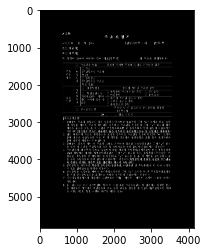

In [8]:
#thresholding the image to a binary image
thresh,img_bin = cv2.threshold(img,128,255,cv2.THRESH_BINARY |cv2.THRESH_OTSU)

# inverting the image 
img_bin = 255-img_bin
cv2.imwrite('C:\\Users\\JSW\\temp_memory\\cv_inverted.png',img_bin)

#Plotting the image to see the output
plotting = plt.imshow(img_bin,cmap='gray')
plt.show()

#### kernel 생성 for MorphGradiner

In [9]:
# Length(width) of kernel as 100th of total width
kernel_len = np.array(img).shape[1]//100

In [10]:
# Defining a vertical kernel to detect all vertical lines of image 
ver_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, kernel_len))

In [11]:
# Defining a horizontal kernel to detect all horizontal lines of image
hor_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_len, 1))

In [12]:
# A kernel of 2x2
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))

### Adaptive Threshold

In [13]:
#Use vertical kernel to detect and save the vertical lines in a jpg
image_1 = cv2.erode(img_bin, ver_kernel, iterations=3)
vertical_lines = cv2.dilate(image_1, ver_kernel, iterations=3)
cv2.imwrite("C:\\Users\\JSW\\temp_memory\\vertical.jpg",vertical_lines)

True

In [14]:
#Use horizontal kernel to detect and save the horizontal lines in a jpg
image_2 = cv2.erode(img_bin, hor_kernel, iterations=3)
horizontal_lines = cv2.dilate(image_2, hor_kernel, iterations=3)
cv2.imwrite("C:\\Users\\JSW\\temp_memory\\horizontal.jpg",horizontal_lines)

True

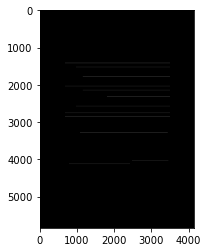

In [15]:
#Plot the generated image
plotting = plt.imshow(image_2,cmap='gray')
plt.show()

In [16]:
# Combine horizontal and vertical lines in a new third image, with both having same weight.
img_vh = cv2.addWeighted(vertical_lines, 0.5, horizontal_lines, 0.5, 0.0)

### MorphClose

In [17]:
#Eroding and thesholding the image
img_vh = cv2.erode(~img_vh, kernel, iterations=2)
thresh, img_vh = cv2.threshold(img_vh,128,255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
cv2.imwrite("C:\\Users\\JSW\\temp_memory\\img_vh.jpg", img_vh)

True

In [18]:
temp = cv2.bitwise_and(img_bin, img_vh)
temp2 = cv2.bitwise_and(temp, horizontal_lines)
result = cv2.bitwise_not(temp)

In [19]:
cv2.imwrite("C:\\Users\\JSW\\temp_memory\\img_temp.jpg", temp)
cv2.imwrite("C:\\Users\\JSW\\temp_memory\\img_temp2.jpg", temp2)
cv2.imwrite("C:\\Users\\JSW\\temp_memory\\img_result.jpg", result)

True

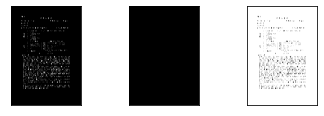

In [21]:
samples = [temp, temp2, result]
for i in range(len(samples)):
    plt.subplot(2,3,i+1),plt.imshow(samples[i],'gray')
    plt.xticks([]),plt.yticks([])
    
plt.show()

### Read data

In [20]:
data = pytesseract.image_to_string(result, lang='kor',config='--psm 4')
print(data)

쇼1138
주소보정서

 

 

 

 

 

 

 

사건번호 _20 가 (차)                   [담당재판부 : 제 _ (단독)부]
원고(채권자)
피고(채무자)
위 사건에 관하여 아래와 같이 피고(채무자)          의 주소를 보정합니다.
ㅁ 주소변동 없음 _ 종전에 적어낸 주소에 그대로 거주하고 있음
니 주소
주소    변 _ (주민등록상 주소가
변동 _ 동 변동
유무 _ 있 ㅁ송달장소
음 _ (주민등록상 주소는
변동 없음)
 니 재송달신청             종전에 적어낸 주소로 송달
달 [| 특별송달신청 니 홍합송달(주간+야간+휴일) [ 주간송달
근  ㄴㄴ | 르으르는 으  | ㅣ 야간송달          [|] 휴일송달
소급  그 (특별송날료는 지역에   조       즈   소
ㅎ 른   그     >        ~ 니종전에 적어낸 주소로 송달
시치   근 따라 차이가 있을 빌레   새로운 주소로 송달
는 9   요 있음)             빼 켄노폭 7 소도 ㅎ딩
ㄴ 송달장소로 송달
[ㅣ 공시송달신청            주소들 알 수 으므로 공시송달을 신청함
(첨부서류 :           )
2 . . . 원고 000ㅇ

[수소보정요령]

1. 상대방의 주소가 변동되지 않은 경우에는 주소변동 없음란의 []에 "\” 표시를 하고, 송달
이 가능한 새로운 주소가 확인되는 경우에는 주소변동 있음란의 [|」에 “"\” 표시와 함께
새로운 주소를 적은 후 이 서면을 주민등록표초본 등 소명자료와 함께 법원에 제출하시기
바랍니다.(상대방의 주소가 변동되지 않은 경우에도 주민등록표초본 등 소명자료 제출요함)

2. 법인 대표자의 주소로 송달장소를 보정할 경우에는 주소변동 있음란의 (에 "\” 표시와
함께 새로운 송달장소를 적은 후 이 서면을 대표자의 주민등록표 초본 등의 소명자료와
함께 법원에 제출하시기 바랍니다.

3. 상대방이 종전에 적어 낸 주소에 그대로 거주하고 있으면 재송달신청란의 [|」에 “"\” 표시
를 하여 이 

### Contour 추출(for more accuracy)

In [23]:
# Morph Gradient(경계 이미지 추출)

dilation = cv2.dilate(temp, kernel, iterations=1)
erosion = cv2.erode(temp,kernel, iterations=3)
result = cv2.morphologyEx(temp, cv2.MORPH_GRADIENT, kernel)

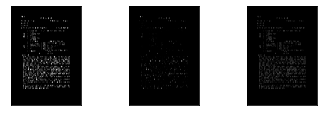

In [24]:
# 이미지 확인 작업
images = [dilation, erosion, result]
for i in range(3):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.xticks([]),plt.yticks([])

plt.show()

In [25]:
# Contour추출
contours, hierarchy = cv2.findContours(erosion, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

In [27]:
# Contour 부분 박스쳐서 이미지 인식 부분 확인하기
for contour in contours:
        # get rectangle bounding contour
        [x, y, w, h] = cv2.boundingRect(contour)

        # Don't plot small false positives that aren't text
        if w < 35 and h < 35:
            continue

        # draw rectangle around contour on original image
        cv2.rectangle(temp, (x, y), (x + w, y + h), (255, 0, 255), 2)

In [32]:
result2 = 255 - cv2.bitwise_and(dilation, temp)
data = pytesseract.image_to_string(result2, lang='kor',config='--psm 6')
print(data)

1138
주소보정서

사건번호 _ 20 가 (차)                   [담당재판부 : 제     (난독)부|]

원고(채권자)

피고(채무자)

위 사건에 관하여 아래와 같이 피고(채무자)          의 주소를 보정합니다.

니 주소변동 없음     종전에 적어낸 주소에 그대로 거주하고 있음
니 주소
주소 _ 변_ (주민등록상 주소가
변동 _ 동 변동)
고누 _ 있 송달장소
음 _ (주민등록상 주소는
변동 없음)
 니 재송달신청            중전에 적어낸 주소로 송달
달   트뼈소나시청 니 통합송달(주간+야간+휴일) 주간송달
몬   [ |  국 별종 날신정 까소다                    호 이소닥
는   트13수드는느   여   1]  +간송달                니 유일송달
소급  도 (특별송달료는 지역에   조지  적어내 조스  소노
이르 필 따라 차이가 있을 수 나 음잔에 격이군 7 소모 승딜
신청 _  91음)             니 새로운 주소로 송달
즈              니 송달장소로 송달
_            주소릎 알 수 없으므로 공시송달을 시청한
고 *] 수~ 다  니       ㅣ -ㄴ은 른 ㅣ 8----  ㅇㅇ  ㅇㅇ 른근 근^6
아 후지숭발신지        (첨부서류 :           )
20 . . . 원고 000

[주소보정요령]

1. 상대방의 주소가 변동되지 않은 경우에는 주소변동 없음란의 []에 "\” 표시를 하고, 송달
이 가능한 새로운 주소가 확인되는 경우에는 주소변동 있음란의 에 “"\” 표시와 함께
새로운 주소를 적은 후 이 서면을 주민등록표초본 등 소명자료와 함께 법원에 제출하시기
바랍니다.(상대방의 주소가 변동되지 않은 경우에도 주민등록표초본 등 소명자료 제출요함)

2. 법인 대표자의 주소로 송달장소를 보정할 경우에는 주소변동 있음란의 (|]에 “"\” 표시와
함께 새로운 송달장소를 적은 후 이 서면을 대표자의 주민등록표 초본 등의 소명자료와
함께 법원에 제출하시

In [ ]:
# 표를 제외한 텍스트의 경우 성능이 상당히 향상됨
# 하지만
# 표 안의 내용은 잘 읽어내지 못함 - 표 안에 가로글만 있는 경우는 괜찮으나
# 가로글과 세로글이 공존하는 경우는 기능이 상당히 저하됨